In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

## Read dataset

In [2]:
df = pd.read_csv('housing.data', delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Adding column names

In [3]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
df.columns = col_name
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Exploratory Data Analysis

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [7]:
col_study = ['ZN', 'INDUS', 'NOX', 'RM']

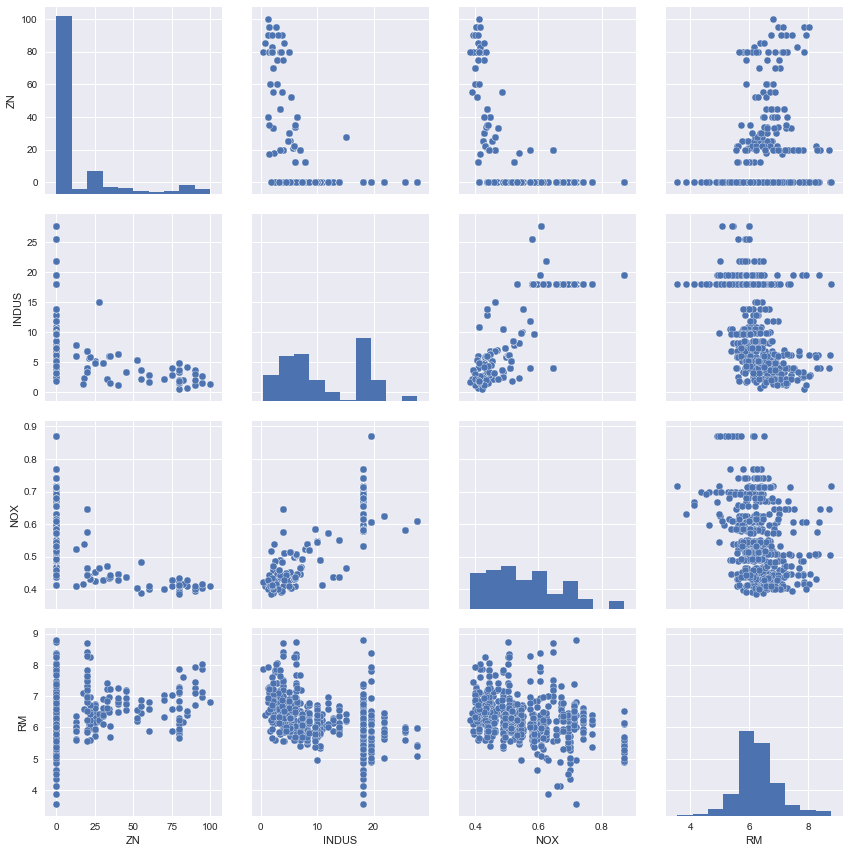

In [8]:
sns.pairplot(df[col_study], size=3, aspect=1);
plt.show()

# Correlation analysis and feature selection

In [9]:
pd.options.display.float_format = '{:,.2f}'.format

In [10]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


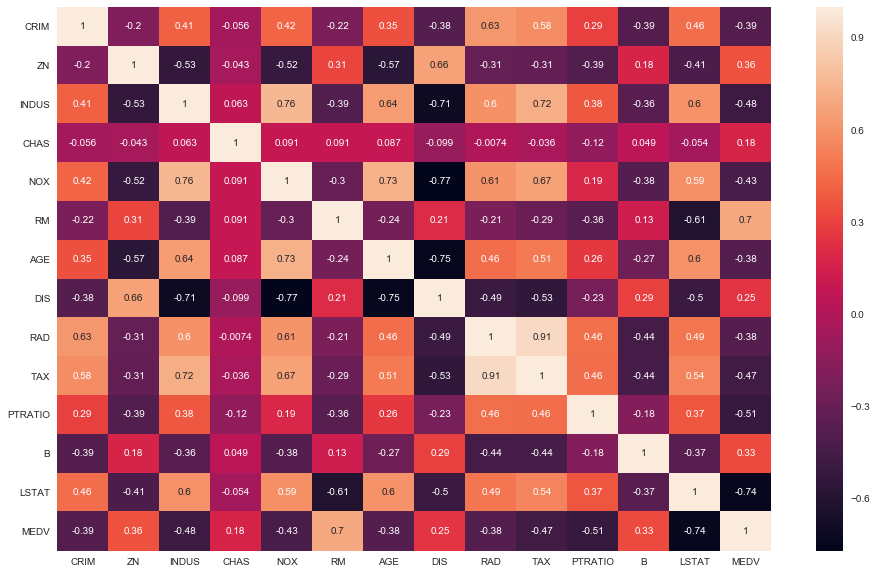

In [11]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Linear Regression with scikit-learn

In [12]:
X = df['RM'].values.reshape(-1,1)
X.shape

(506, 1)

In [13]:
y = df['MEDV'].values
y.shape

(506,)

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

### Training Model

In [16]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Check coefficient and intercept

In [17]:
model.coef_

array([9.10210898])

In [18]:
model.intercept_

-34.670620776438554

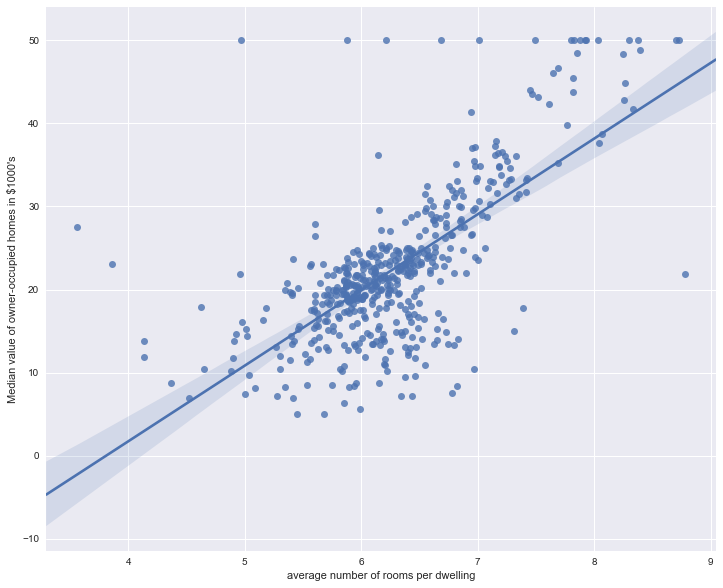

In [19]:
plt.figure(figsize=(12,10));
sns.regplot(X, y);
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

# Robust Regression

In [20]:
from sklearn.linear_model import RANSACRegressor

In [21]:
ransac = RANSACRegressor()

In [22]:
ransac.fit(X, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
        loss='absolute_loss', max_skips=inf, max_trials=100,
        min_samples=None, random_state=None, residual_metric=None,
        residual_threshold=None, stop_n_inliers=inf, stop_probability=0.99,
        stop_score=inf)

In [23]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [24]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

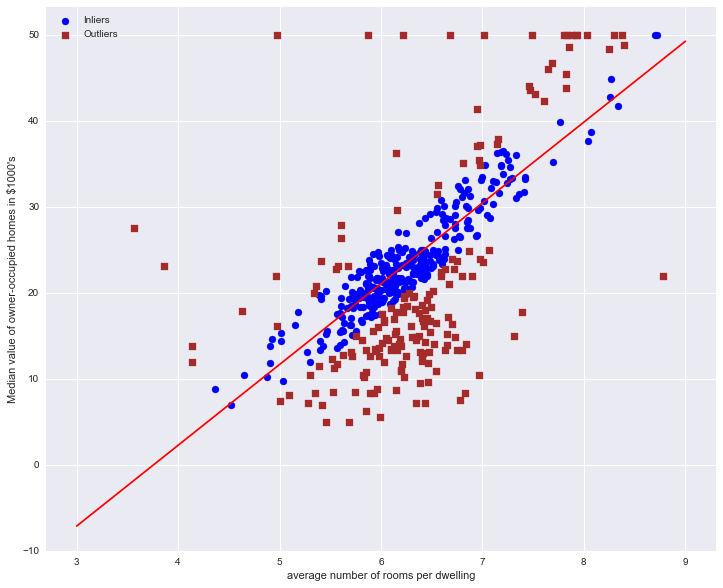

In [25]:
plt.figure(figsize=(12,10));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper left')
plt.show()

### Check intercept and coefficient

In [26]:
ransac.estimator_.coef_

array([9.38693795])

In [27]:
ransac.estimator_.intercept_

-35.26807443836464

# Performance Evaluation

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
y_train_pred = lr.predict(X_train)

In [33]:
y_test_pred = lr.predict(X_test)

# Method1- Residual Analysis

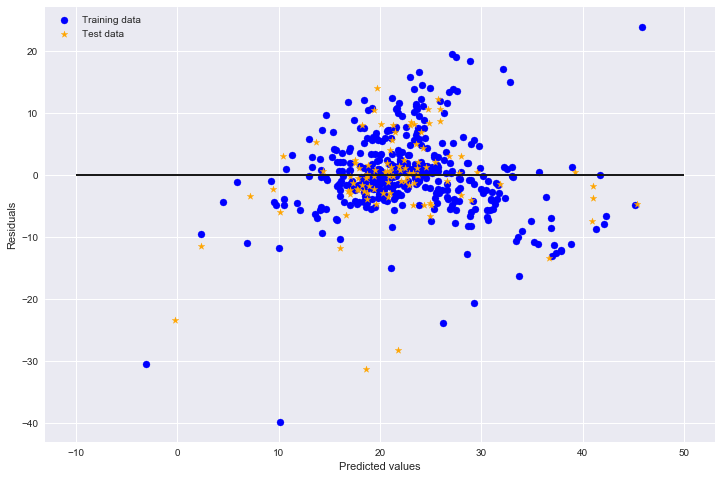

In [34]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='k')
plt.show()

# Method 2- Mean Squared Error(MSE)

In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mean_squared_error(y_train, y_train_pred)

42.82047894172751

In [37]:
mean_squared_error(y_test, y_test_pred)

46.9073516273953

# Method 3- Coefficient of determination($R^2$)

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_train, y_train_pred)

0.4970800097843844

In [40]:
r2_score(y_test, y_test_pred)

0.423943868164563

# Multiple Regression using stats model

In [45]:
X=df.iloc[:,:-1].values
X.shape

(506, 13)

In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

E:\Anaconda\Aditya\Anaconda3\envs\iris_project\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


We need to add a constant term to allow statsmodel.api to calculate the bias / intercepts.

In [47]:
X_constant = sm.add_constant(X)

In [49]:
col_name = ['const','CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [55]:
X=pd.DataFrame(X_constant,columns=col_name)

In [52]:
model = sm.OLS(y, X_constant)

In [53]:
lr = model.fit()

In [54]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 15 Jul 2018   Prob (F-statistic):          6.72e-135
Time:                        08:14:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
x1            -0.1080      0.033     -3.287      0.001      -0.173      -0.043
x2             0.0464      0.014      3.382      0.001       0.019       0.073
x3             0.0206      0.061      0.334      0.738      -0.100       0.141
x4             2.6867      0.862      3.118      0.002       0.994       4.380
x5           -17.7666      3.820     -4.651      0.000     -25.272     -10.262
x6             3.8099      0.418      9.116      0.000       2.989       4.631
x7             0.0007      0.013      0.052      0.958      -0.025       0.027
x8            -1.4756      0.199     -7.398      0.000      -1.867      -1.084
x9             0.3060      0.066      4.613      0.000       0.176       0.436
x10           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
x11           -0.9527      0.131     -7.283      0.000      -1.210      -0.696
x12            0.0093      0.003      3.467      0.001       0.004       0.015
x13           -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Detecting Collinearity with eigen vectors

In [56]:
pd.options.display.float_format = '{:,.4f}'.format

In [63]:
X=X.drop('const',axis=1)

In [65]:
corr_matrix=X.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0000,-0.2005,0.4066,-0.0559,0.4210,-0.2192,0.3527,-0.3797,0.6255,0.5828,0.2899,-0.3851,0.4556
ZN,-0.2005,1.0000,-0.5338,-0.0427,-0.5166,0.3120,-0.5695,0.6644,-0.3119,-0.3146,-0.3917,0.1755,-0.4130
INDUS,0.4066,-0.5338,1.0000,0.0629,0.7637,-0.3917,0.6448,-0.7080,0.5951,0.7208,0.3832,-0.3570,0.6038
CHAS,-0.0559,-0.0427,0.0629,1.0000,0.0912,0.0913,0.0865,-0.0992,-0.0074,-0.0356,-0.1215,0.0488,-0.0539
NOX,0.4210,-0.5166,0.7637,0.0912,1.0000,-0.3022,0.7315,-0.7692,0.6114,0.6680,0.1889,-0.3801,0.5909
RM,-0.2192,0.3120,-0.3917,0.0913,-0.3022,1.0000,-0.2403,0.2052,-0.2098,-0.2920,-0.3555,0.1281,-0.6138
AGE,0.3527,-0.5695,0.6448,0.0865,0.7315,-0.2403,1.0000,-0.7479,0.4560,0.5065,0.2615,-0.2735,0.6023
DIS,-0.3797,0.6644,-0.7080,-0.0992,-0.7692,0.2052,-0.7479,1.0000,-0.4946,-0.5344,-0.2325,0.2915,-0.4970
RAD,0.6255,-0.3119,0.5951,-0.0074,0.6114,-0.2098,0.4560,-0.4946,1.0000,0.9102,0.4647,-0.4444,0.4887
TAX,0.5828,-0.3146,0.7208,-0.0356,0.6680,-0.2920,0.5065,-0.5344,0.9102,1.0000,0.4609,-0.4418,0.5440


In [66]:
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6255,0.0000,0.0000,0.0000,0.0000
ZN,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6644,0.0000,0.0000,0.0000,0.0000,0.0000
INDUS,0.0000,0.0000,1.0000,0.0000,0.7637,0.0000,0.6448,-0.7080,0.0000,0.7208,0.0000,0.0000,0.6038
CHAS,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NOX,0.0000,0.0000,0.7637,0.0000,1.0000,0.0000,0.7315,-0.7692,0.6114,0.6680,0.0000,0.0000,0.0000
RM,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.6138
AGE,0.0000,0.0000,0.6448,0.0000,0.7315,0.0000,1.0000,-0.7479,0.0000,0.0000,0.0000,0.0000,0.6023
DIS,0.0000,0.6644,-0.7080,0.0000,-0.7692,0.0000,-0.7479,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RAD,0.6255,0.0000,0.0000,0.0000,0.6114,0.0000,0.0000,0.0000,1.0000,0.9102,0.0000,0.0000,0.0000
TAX,0.0000,0.0000,0.7208,0.0000,0.6680,0.0000,0.0000,0.0000,0.9102,1.0000,0.0000,0.0000,0.0000


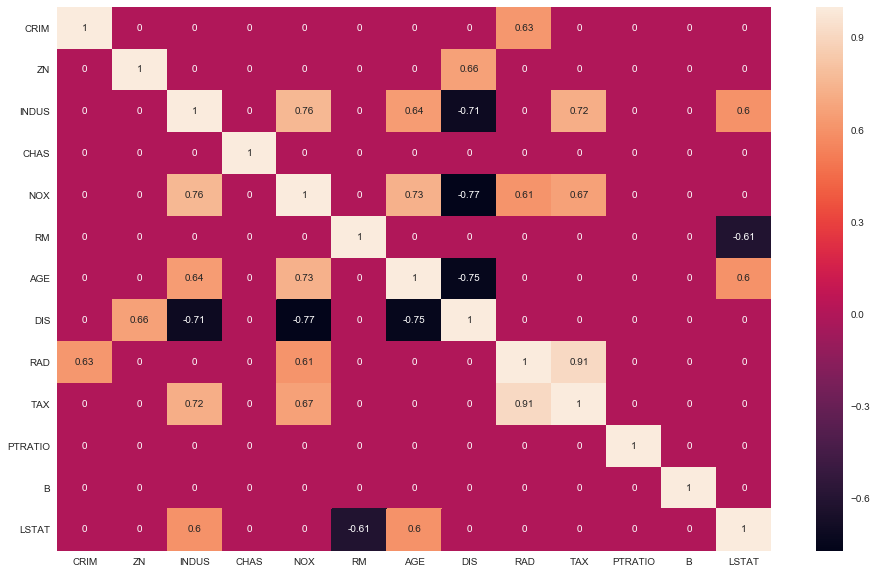

In [67]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [70]:
eigenvalues, eigenvectors = np.linalg.eig(X.corr())

In [71]:
pd.Series(eigenvalues).sort_values()

8    0.0635
10   0.1693
11   0.1860
12   0.2202
9    0.2769
7    0.3961
6    0.5354
5    0.6574
4    0.8348
3    0.8576
2    1.2426
1    1.4333
0    6.1268
dtype: float64

Note that index 8, eigenvalue of 0.0635, is near to zero or very small compared to the others. Small value represents presence of collinearity. 

In [72]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

9    0.7202
8    0.6335
2    0.2511
1    0.0809
0    0.0460
5    0.0456
4    0.0436
6    0.0386
3    0.0359
12   0.0244
10   0.0234
7    0.0183
11   0.0045
dtype: float64

Note that index 9, 8, 2 have very high loading when compared against the rest

In [74]:
print(df.columns[2], df.columns[8], df.columns[9])

INDUS RAD TAX


These are the factors that are causing multicollinearity problem.